1. Repite el ejemplo *Arxiv ML Papers (I)*, agrega dos nuevas columnas al DataFrame final: `Abstract`, con el resumen de cada paper; `Submitted`, con la fecha en la que fue agregado al sistema. **Hint**: Ambos elementos se encuentran dentro de la *url* encontrada.

In [1]:
from requests_html import HTMLSession
import pandas as pd

In [2]:
url = "https://arxiv.org/list/stat.ML/recent"
with HTMLSession() as sess:
    r = sess.get(url)
r

<Response [200]>

In [3]:
divpage = r.html.find("div[id='dlpage']", first=True)
r.html.find("div[id='dlpage']")

[<Element 'div' id='dlpage'>]

In [4]:
divpage.find("h1", first=True).text

'Machine Learning'

In [5]:
papers_links = divpage.find("dt")
len(papers_links)

25

In [6]:
papers_titles = divpage.find("dd")
len(papers_titles)

25

In [7]:
values = []
for link_secc, title_secc in zip(papers_links, papers_titles):
    title = title_secc.find("div[class='list-title mathjax']", first=True).text
    
    abstract_url = link_secc.find("a[title='Abstract']", first=True).absolute_links
    abstract_url, *_ = abstract_url
    
    values.append([title, abstract_url])

In [8]:
df_values = pd.DataFrame(values, columns=["title", "url"])
df_values.head()

,title,url
0,Title: Self-Tuning Deep Reinforcement Learning,https://arxiv.org/abs/2002.12928
1,Title: The estimation error of general first o...,https://arxiv.org/abs/2002.12903
2,Title: Generalizing Convolutional Neural Netwo...,https://arxiv.org/abs/2002.12880
3,Title: A Deep Generative Model for Fragment-Ba...,https://arxiv.org/abs/2002.12826
4,Title: Risk Bounds for Multi-layer Perceptrons...,https://arxiv.org/abs/2002.12640


In [9]:
df_values["url"][0]

'https://arxiv.org/abs/2002.12928'

In [10]:
valor = []
A = range(len(df_values["url"]))
for i in A:
    with HTMLSession() as sess:
        r = sess.get(df_values["url"][i])
    Submitted = r.html.find("div[class = 'dateline']", first = True).text
    Abstract = r.html.find("blockquote[class = 'abstract mathjax']", first= True).text
    valor.append([Submitted, Abstract])

In [11]:
valores = pd.DataFrame(valor, columns = ["Submitted","Abstract"])
df_values["Submitted"] = valores["Submitted"]
df_values["Abstract"] = valores["Abstract"]
df_values
df_values = df_values.assign(Submitted=df_values.Submitted.str.lstrip("Submitted on"))
df_values = df_values.assign(Abstract=df_values.Abstract.str.lstrip("Abstract :"))

In [12]:
df_values

,title,url,Submitted,Abstract
0,Title: Self-Tuning Deep Reinforcement Learning,https://arxiv.org/abs/2002.12928,(Submitted on 28 Feb 2020),Reinforcement learning (RL) algorithms often r...
1,Title: The estimation error of general first o...,https://arxiv.org/abs/2002.12903,(Submitted on 28 Feb 2020),Modern large-scale statistical models require ...
2,Title: Generalizing Convolutional Neural Netwo...,https://arxiv.org/abs/2002.12880,(Submitted on 25 Feb 2020),The translation equivariance of convolutional ...
3,Title: A Deep Generative Model for Fragment-Ba...,https://arxiv.org/abs/2002.12826,(Submitted on 28 Feb 2020),Molecule generation is a challenging open prob...
4,Title: Risk Bounds for Multi-layer Perceptrons...,https://arxiv.org/abs/2002.12640,(Submitted on 28 Feb 2020),We characterize the behavior of integral opera...
5,Title: Causality and Robust Optimization,https://arxiv.org/abs/2002.12626,(Submitted on 28 Feb 2020),decision-maker must consider cofounding bias w...
6,Title: Learning Directly from Grammar Compress...,https://arxiv.org/abs/2002.12570,(Submitted on 28 Feb 2020),Neural networks using numerous text data have ...
7,Title: Spectral neighbor joining for reconstru...,https://arxiv.org/abs/2002.12547,(Submitted on 28 Feb 2020),key assumption in multiple scientific applicat...
8,Title: Generalized Sliced Distances for Probab...,https://arxiv.org/abs/2002.12537,(Submitted on 28 Feb 2020),Probability metrics have become an indispensab...
9,Title: Cautious Reinforcement Learning via Dis...,https://arxiv.org/abs/2002.12475,(Submitted on 27 Feb 2020),We study the estimation of risk-sensitive poli...


2. Por medio de la librería `requests` y el API de AlphaVantage, consigue los precios históricos de las monedas `["MXN", "EUR", "BRL", "ARS", "CHF"]` respecto al dólar (todos los precios deben estar en dólares). Crea un DataFrame con cada colúmna la moneda de referencia:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>MXN</th>      <th>EUR</th>      <th>BRL</th>      <th>ARS</th>      <th>CHF</th>    </tr>  </thead>  <tbody>    <tr>      <th>2014-11-24</th>      <td>0.0732</td>      <td>1.2438</td>      <td>0.3920</td>      <td>0.1169</td>      <td>1.0342</td>    </tr>    <tr>      <th>2014-11-25</th>      <td>0.0731</td>      <td>1.2473</td>      <td>0.3955</td>      <td>0.1169</td>      <td>1.0370</td>    </tr>    <tr>      <th>2014-11-26</th>      <td>0.0728</td>      <td>1.2507</td>      <td>0.3995</td>      <td>0.1168</td>      <td>1.0401</td>    </tr>    <tr>      <th>2014-11-27</th>      <td>0.0726</td>      <td>1.2458</td>      <td>0.3947</td>      <td>0.1169</td>      <td>1.0363</td>    </tr>    <tr>      <th>2014-11-28</th>      <td>0.0717</td>      <td>1.2451</td>      <td>0.3891</td>      <td>0.1168</td>      <td>1.0351</td>    </tr>  </tbody></table>

In [13]:
import requests
import os
from collections import defaultdict

In [14]:
%config InlineBackend.figure_format = "retina"

In [15]:
url = "https://www.alphavantage.co"
base_url = "https://www.alphavantage.co/query"
# Cargamos el API Key de Alpha Vantage (es personal)
avkey = "NSGK37AGRCEJ690P"

In [16]:
monedas = ["MXN", "EUR", "BRL", "ARS", "CHF"]

In [17]:
base = defaultdict(dict)

In [18]:
for i in monedas:
    precio = {"function": "FX_DAILY",
              "to_symbol": "USD",
              "from_symbol": i,
              "apikey": avkey,
              "outputsize": "full"}
    r = requests.get(base_url, params = precio)
    datos = r.json()
    datos1 =pd.DataFrame(datos["Time Series FX (Daily)"], dtype=float).T.sort_index()
    base[i]= datos1["4. close"]

In [19]:
base

defaultdict(dict, {'MXN': 2014-11-07    0.0737
             2014-11-09    0.0738
             2014-11-10    0.0734
             2014-11-11    0.0735
             2014-11-12    0.0737
                            ...  
             2020-02-27    0.0512
             2020-02-28    0.0510
             2020-02-29    0.0510
             2020-03-01    0.0503
             2020-03-02    0.0508
             Name: 4. close, Length: 1787, dtype: float64,
             'EUR': 2002-02-14    0.8736
             2002-02-15    0.8723
             2002-02-18    0.8705
             2002-02-19    0.8758
             2002-02-20    0.8702
                            ...  
             2020-02-26    1.0882
             2020-02-27    1.1002
             2020-02-28    1.1029
             2020-03-01    1.1045
             2020-03-02    1.1046
             Name: 4. close, Length: 5000, dtype: float64,
             'BRL': 2014-11-07    0.3902
             2014-11-09    0.3894
             2014-11-10    0.3933
     

In [20]:
tabla = pd.DataFrame(base, dtype = float).dropna().sort_index()
tabla

,MXN,EUR,BRL,ARS,CHF
2014-11-07,0.0737,1.2454,0.3902,0.1170,1.0341
2014-11-09,0.0738,1.2462,0.3894,0.1170,1.0359
2014-11-10,0.0734,1.2424,0.3933,0.1170,1.0328
2014-11-11,0.0735,1.2473,0.3894,0.1170,1.0364
2014-11-12,0.0737,1.2428,0.3890,0.1170,1.0337
...,...,...,...,...,...
2020-02-26,0.0518,1.0882,0.2242,0.0157,1.0233
2020-02-27,0.0512,1.1002,0.2224,0.0156,1.0323
2020-02-28,0.0510,1.1029,0.2230,0.0156,1.0353
2020-03-01,0.0503,1.1045,0.2230,0.0156,1.0369


3. Con el DataFrame creado en el ejercicio 2, crea el siguiente mapa de calor con la correlación entre cada una de las monedas. **hint**: Revisa que métodos tiene un DataFrame para crear correlaciones; considera la librería `seaborn`.

![](../files/lec04/imgs/heatmap.png)

In [21]:
import seaborn as sns
sns.heatmap(tabla.corr(), annot=True)

4. Con el DataFrame creado en el ejercicio 2, crea un nuevo DataFrame que incluya una correlación móvil con ventana de 30 días de cada una de las monedas respecto a `"MXN"`. **hint**: Investiga sobre el método `.xs` de un DataFrame

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>EUR</th>      <th>BRL</th>      <th>ARS</th>      <th>CHF</th>    </tr>  </thead>  <tbody>    <tr>      <th>2015-03-19</th>      <td>0.900941</td>      <td>0.870440</td>      <td>0.835029</td>      <td>0.916637</td>    </tr>    <tr>      <th>2015-03-20</th>      <td>0.874866</td>      <td>0.815453</td>      <td>0.762308</td>      <td>0.903594</td>    </tr>    <tr>      <th>2015-03-22</th>      <td>0.866783</td>      <td>0.789977</td>      <td>0.726098</td>      <td>0.900547</td>    </tr>    <tr>      <th>2015-03-23</th>      <td>0.835823</td>      <td>0.728781</td>      <td>0.643129</td>      <td>0.885424</td>    </tr>    <tr>      <th>2015-03-24</th>      <td>0.801267</td>      <td>0.671188</td>      <td>0.560149</td>      <td>0.877682</td>    </tr>  </tbody></table>

In [22]:
correlacion_mov = tabla.rolling(30).corr().dropna()

In [23]:
correlacion = correlacion_mov.xs("MXN", level = 1)[["EUR", "BRL", "ARS", "CHF"]]
correlacion

,EUR,BRL,ARS,CHF
2014-12-10,0.687213,0.325804,0.974887,0.685253
2014-12-11,0.646242,0.444098,0.975359,0.634561
2014-12-12,0.567223,0.531188,0.976607,0.548576
2014-12-14,0.510289,0.576438,0.979615,0.485051
2014-12-15,0.473569,0.626304,0.981691,0.444021
...,...,...,...,...
2020-02-26,-0.132666,0.332192,0.146621,-0.273137
2020-02-27,-0.196531,0.504148,0.304529,-0.355744
2020-02-28,-0.268271,0.627480,0.426425,-0.451384
2020-03-01,-0.340049,0.718202,0.533992,-0.538785


In [24]:
correlacion = correlacion[correlacion.index>= "2015-03-19"]

In [25]:
correlacion

,EUR,BRL,ARS,CHF
2015-03-19,0.900941,0.870440,0.835029,0.916637
2015-03-20,0.874866,0.815453,0.762308,0.903594
2015-03-22,0.866783,0.789977,0.726098,0.900547
2015-03-23,0.835823,0.728781,0.643129,0.885424
2015-03-24,0.801267,0.671188,0.560149,0.877682
...,...,...,...,...
2020-02-26,-0.132666,0.332192,0.146621,-0.273137
2020-02-27,-0.196531,0.504148,0.304529,-0.355744
2020-02-28,-0.268271,0.627480,0.426425,-0.451384
2020-03-01,-0.340049,0.718202,0.533992,-0.538785


5. Con el DataFrame creado en el ejercicio 4, crea la siguiente figura con _scatterplots_ entre todas las combinaciones de las correlaciones respecto a `"MXN"`. ¿Encuentras algún patrón en alguna combinación?

![](../files/lec04/imgs/scatter.png)

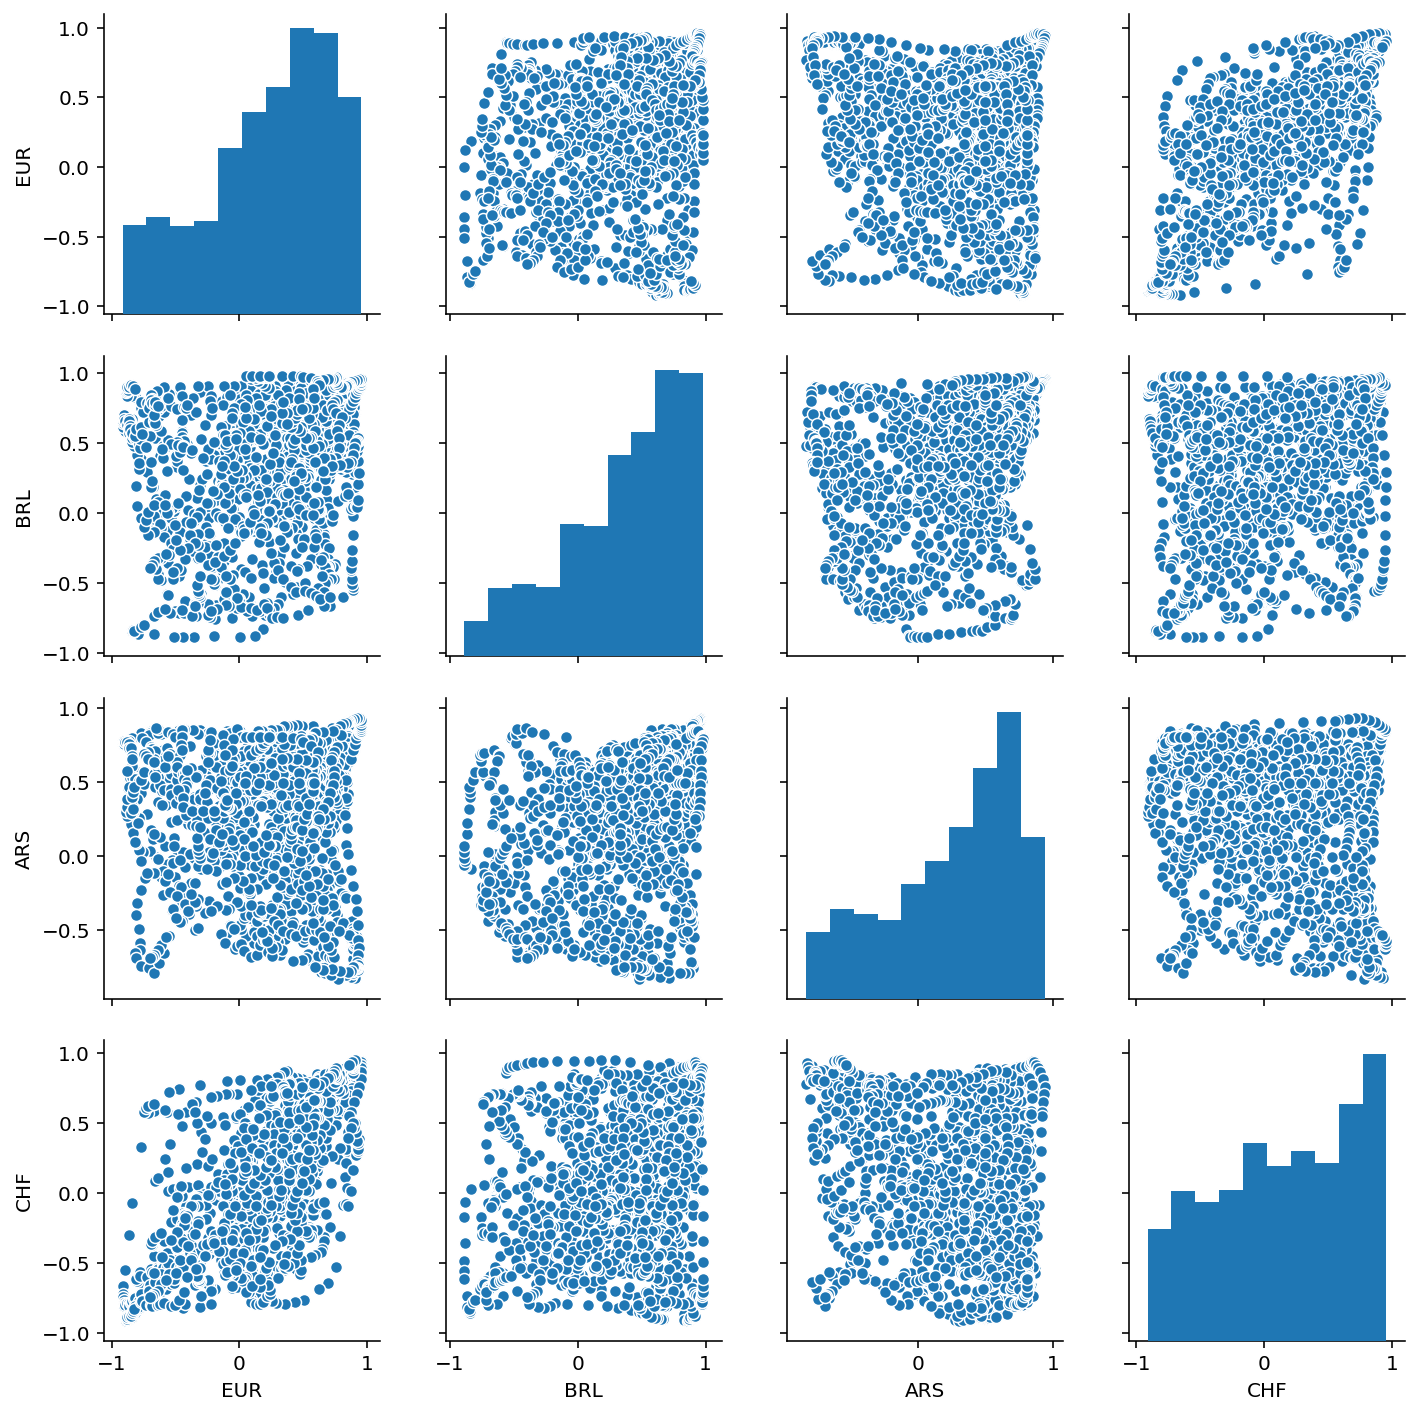

In [26]:
sns.pairplot(correlacion)

In [27]:
# no encuentro un patron, aunque en se podrìa decir que si lo vemos como matriz, parece una matriz simétrica

6. Con el DataFrame creado en el ejercicio 4, crea la siguiente figura, la cuál representa, a cada observación, la correlación promedio entre todas las monedas respecto a `"MXN"` y unas bandas que representan la correlación máxima y mínima a cada observación.

![](../files/lec04/imgs/corr_ts.png)

In [ ]:
import matplotlib.pyplot as plt
corr_prom= correlacion.mean(axis=1, skipna=True)
corr_max= correlacion.max(axis=1, skipna=True)
corr_min= correlacion.min(axis=1, skipna=True)
plt.plot(corr_prom, linewidth=2)
plt.fill_between(correlaccion, corr_min, corr_max, alpha=.1)